In [26]:
import pyforest

In [27]:
df=pd.read_csv(r'D:\Machine Learning\Machine-Learning\Data\titanic.csv',usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [28]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mode())

In [29]:
print(df.head())
print(df.isnull().sum())

   Survived   Age     Fare
0         0  34.5   7.8292
1         1  47.0   7.0000
2         0  62.0   9.6875
3         0  27.0   8.6625
4         1  22.0  12.2875
Survived    0
Age         0
Fare        1
dtype: int64


In [30]:
df.dropna(inplace=True)

In [31]:
X=df.iloc[:,1:3]
Y=df.iloc[:,0]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

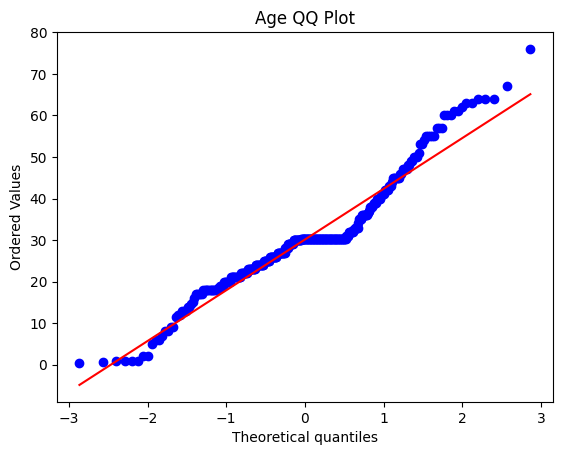

In [33]:
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Naveen\AppData\Local\Temp\ipykernel_11744\3409084090.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], kde=True, hist=True, bins=30, color='skyblue', hist_kws={'edgecolor': 'black'})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

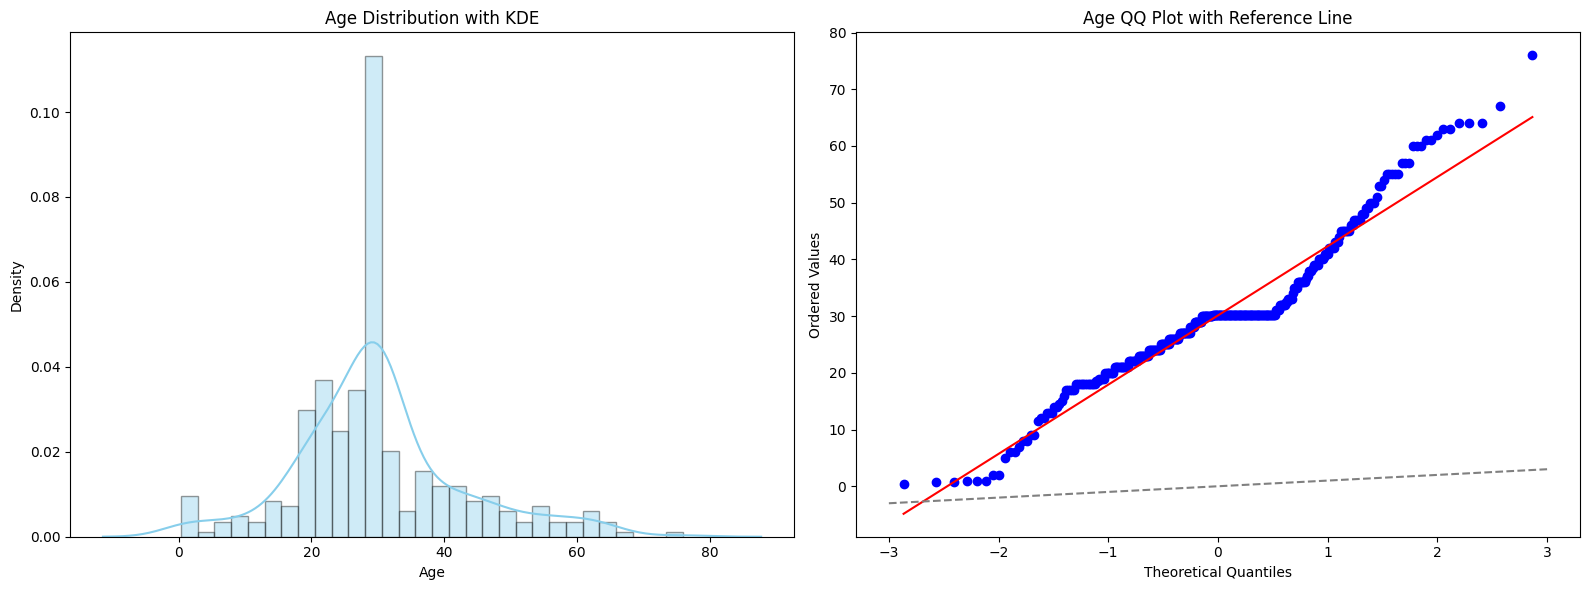

In [34]:
plt.figure(figsize=(16, 6))

# PDF Plot with KDE
plt.subplot(121)
sns.distplot(X_train['Age'], kde=True, hist=True, bins=30, color='skyblue', hist_kws={'edgecolor': 'black'})
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')

# QQ Plot with Reference Line
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot with Reference Line')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Add a reference line to the QQ plot
plt.plot([-3, 3], [-3, 3], linestyle='--', color='gray', label='Reference Line')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Accuracy LR 0.6428571428571429
Accuracy DT 0.5357142857142857


In [38]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

<IPython.core.display.Javascript object>

In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6428571428571429
Accuracy DT 0.5238095238095238


In [41]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,Y,scoring='accuracy',cv=10)))

<IPython.core.display.Javascript object>

LR 0.6548780487804877


<IPython.core.display.Javascript object>

DT 0.5878048780487803
